Copyright (c) 2019 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book-3rd-edition

[MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)

# ML Week 2 Assignment 

Stan Lyubarskiy

## Instructions

The programming assignment for the Perceptron/Adaline mode is

1. Download the sample Python code that comes with the assigned textbook, Python Machine Learning*.

2. Use the Iris dataset that's referenced in the text.

3. You can use the sample code from the text as a starting point or you can write your own code from scratch.

4. Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are linearly separable using the features that you have chosen.

Then Apply the Perceptron and Adaline models to the classes/feature that you have chosen and report your results.

5. Repeat Step 4) using three features at a time.

6. Repeat Step 4) using all four features at the same time.

7. Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are NOT linearly separable using the features that you have chosen.

Then Apply the Perceptron and Adaline models to the classes/features that you have chosen and report your results.

8. Repeat Step 7) using three features at a time.

9. Repeat Step 7) using all four feature at the same time.

10. Compare your results for the Perceptron and Adaline models.

11. Submit your results as an ipython notebook (i.e. in ipynb format).

You can use the example code in file M1_Python ML Basics.ipynb uploaded to the modules 1 & 2.

*Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn,

# Chapter 2 - Training Machine Learning Algorithms for Classification

# Implementing a perceptron learning algorithm in Python

## An object-oriented perceptron API

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training a perceptron model on the Iris dataset

### Reading-in the Iris data

In [2]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
#Rename the columns to more descriptive names
df = df.rename(columns={0:"Sepal Length", 1:"Sepal Width", 2:"Petal Length", 3:"Petal Width", 4:"Class Label"})

In [4]:
#Find all the unique Iris species
df["Class Label"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Plotting the Iris data

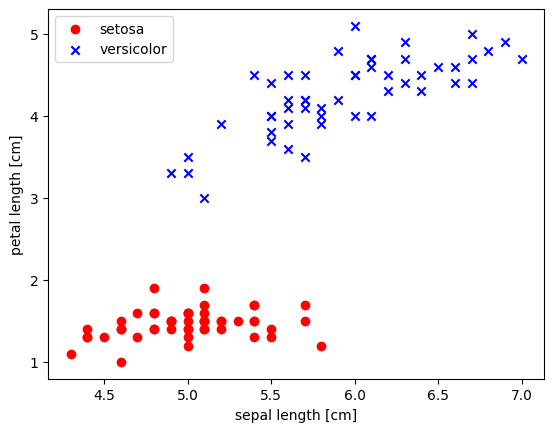

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Training the perceptron model

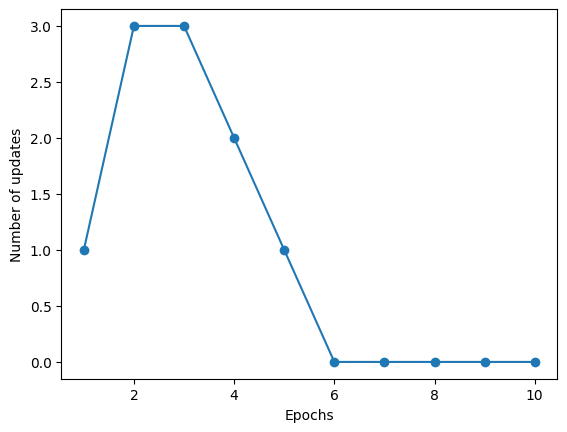

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### A function for plotting decision regions

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\stanl\AppData\Local\Temp\ipykernel_17780\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


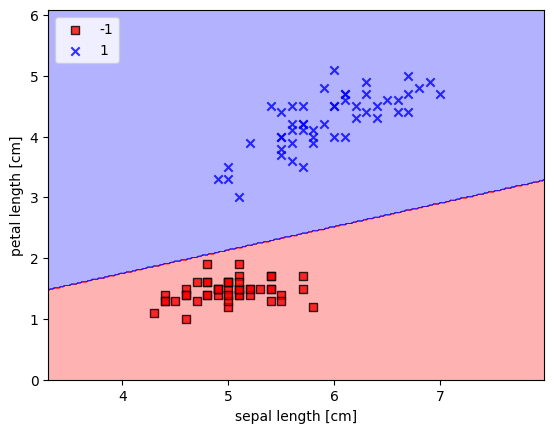

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### Observation

We can clearly see that the data comparing sepal length to petal length for the setosa and verticolor species is linearly separable. This is demonstrated by the line drawn between the two species. If they were not linearly separable, then the Perceptron model would not even be able to approximate a line.

Let us try the same exercise with the same species but a different set of two features.

## Plotting Setosa and Versicolor Using Perceptron with Two Linearly Separable Features

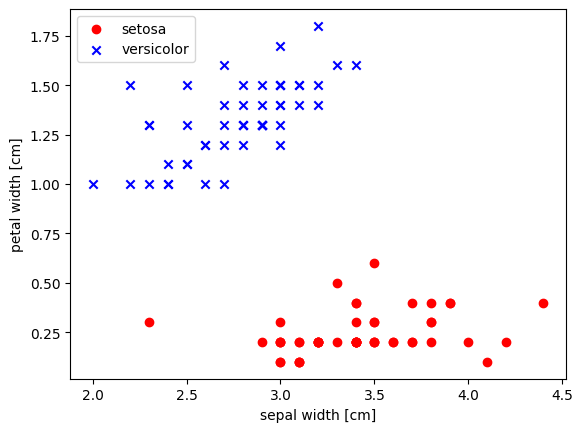

In [9]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal width and petal width
X = df.iloc[0:100, [1, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

### Training the Perceptron Model with Two Linearly Separable Features

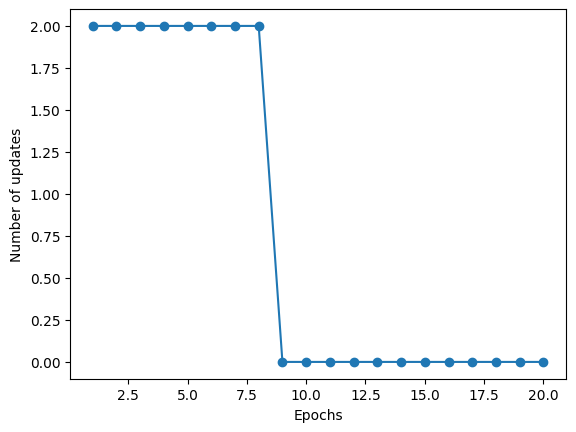

In [10]:
ppn = Perceptron(eta=0.1, n_iter=20)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### Plotting the Decision Region with Two Linearly Separable Features

C:\Users\stanl\AppData\Local\Temp\ipykernel_17780\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


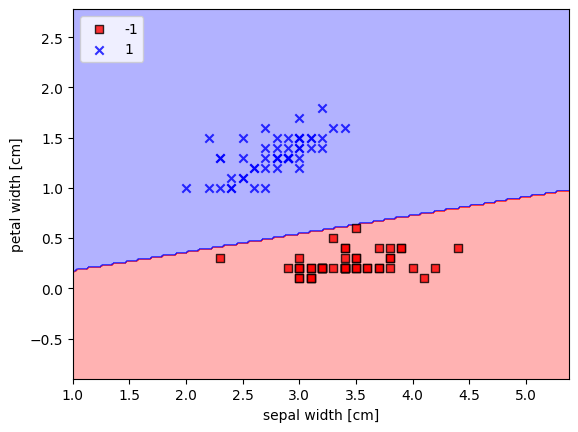

In [11]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

### Observation for Perceptron with Two Linearly Separable Features

After plotting sepal width and petal width for setosa and versicolor, we can clearly see that they are linearly separable. The perceptron model just barely draws linear separation between the two, illustrating that it does look for a perfect symmetric fit but instead looks for the first linearly separable fit. I increased the number of iterations for this example because it more epochs for the errors to stabilize at zero compared to the first plot for sepal length and petal length. The errors hit zero shortly after passing eight epochs.

## Plotting Setosa and Versicolor using Perceptron with Three Linearly Separable Features

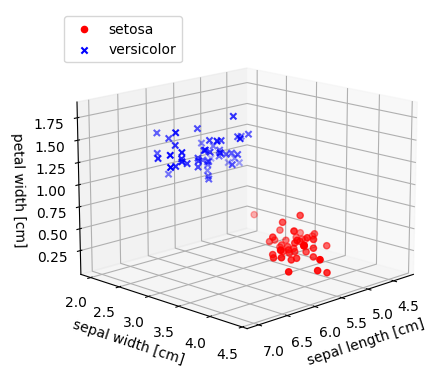

In [12]:
#create a 3D graph for three features
ax = plt.axes(projection='3d')

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length, sepal width, and petal width
X = df.iloc[0:100, [0, 1, 3]].values

# plot the data
ax.scatter3D(X[:50, 0], X[:50, 1], X[:50, 2], marker='o', color='red', label='setosa')
ax.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100, 2], marker='x', color='blue', label="versicolor")
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal width [cm]')
ax.view_init(15, 45)

plt.legend(loc='upper left')

plt.show()

### Training the Perceptron Model with Three Linearly Separable Features

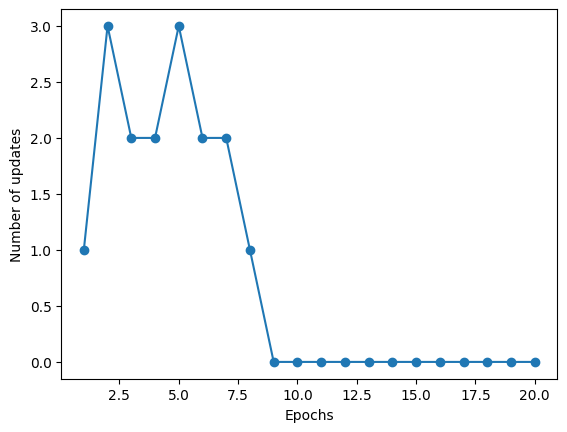

In [13]:
ppn = Perceptron(eta=0.1, n_iter=20)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [14]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.loc[:99,"Class Label"]

for i in ppn.predict(X):
    if i == -1:
        species.append("Iris-setosa")
    else: 
        species.append("Iris-versicolor")

table = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
table["Correct"] = (table["Prediction"] == table["Actual"])
        
#view the data
table

,Prediction,Actual,Correct
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-setosa,Iris-setosa,True
3,Iris-setosa,Iris-setosa,True
4,Iris-setosa,Iris-setosa,True
...,...,...,...
95,Iris-versicolor,Iris-versicolor,True
96,Iris-versicolor,Iris-versicolor,True
97,Iris-versicolor,Iris-versicolor,True
98,Iris-versicolor,Iris-versicolor,True


In [15]:
#Check if any predictions are wrong, i.e. if false exists in the Correct column
table["Correct"].value_counts()

True    100
Name: Correct, dtype: int64

### Observation for Perceptron with Three Linearly Separable Features

After plotting sepal length, sepal width, and petal width for setosa and versicolor, we can clearly see that they are linearly separable. The 3D graph shows the data clustering in a way where we can imagine a linear line being drawn to separate the data. Unfortunately, I was unable to adjust the decision boundary function to draw this line. However, we can see that around the 8th epoch, the errors hit zero when training the model. Additionally, I created a new dataframe that compares the predicted class to the actual class and all the predictions were correct demonstrating that the data is linearly separable even with three features.

## Plotting Setosa and Versicolor using Perceptron with Four Linearly Separable Features

### Training the Perceptron Model with Four Linearly Separable Features

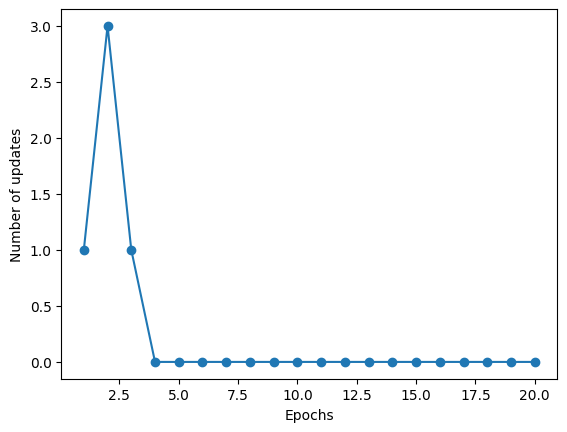

In [16]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[0:100, [0, 1, 2, 3]].values

ppn = Perceptron(eta=0.1, n_iter=20)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [17]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.loc[:99,"Class Label"]

for i in ppn.predict(X):
    if i == -1:
        species.append("Iris-setosa")
    else: 
        species.append("Iris-versicolor")

four_features = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
four_features["Correct"] = (four_features["Prediction"] == four_features["Actual"])
        
#view the data
print(four_features)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
four_features["Correct"].value_counts()

         Prediction           Actual  Correct
0       Iris-setosa      Iris-setosa     True
1       Iris-setosa      Iris-setosa     True
2       Iris-setosa      Iris-setosa     True
3       Iris-setosa      Iris-setosa     True
4       Iris-setosa      Iris-setosa     True
..              ...              ...      ...
95  Iris-versicolor  Iris-versicolor     True
96  Iris-versicolor  Iris-versicolor     True
97  Iris-versicolor  Iris-versicolor     True
98  Iris-versicolor  Iris-versicolor     True
99  Iris-versicolor  Iris-versicolor     True

[100 rows x 3 columns]


True    100
Name: Correct, dtype: int64

### Observation for Perceptron with Four Linearly Separable Features

I was unable to plot all four features on a 4D graph as the visual would be too hard to understand to the naked eye. However, I was still able to train the model and plot errors/updates against the number of passes/epochs. Interestingly, despite adding another feature, the data converged even faster to zero after about the fourth epoch. Similarly to the three feature example, I could not create a decision boundary with four features. Nonetheless, after creating a new dataframe, we can see that the predictions of the species were correct 100 percent of the time.

## Plotting Versicolor and Virginica using Perceptron with Two Non-Linearly Separable Features

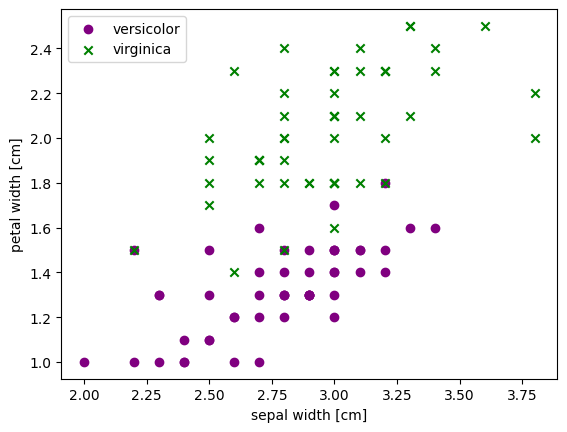

In [18]:
# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal width and petal width
X = df.iloc[50:150, [1,3]].values

# plot data
plt.scatter(X[0:50, 0], X[0:50, 1],
            color='purple', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='x', label='virginica')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

### Training the Perceptron Model with Two Non-Linearly Separable Features

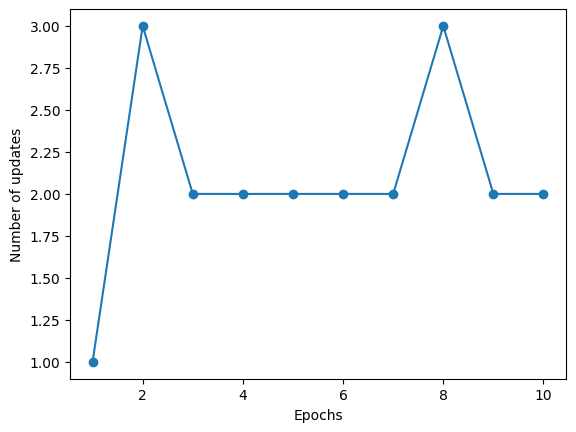

In [19]:
# ppn = Perceptron(eta=0.1, n_iter=500)
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### Plotting the Decision Region with Two Non-Linearly Separable Features

C:\Users\stanl\AppData\Local\Temp\ipykernel_17780\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


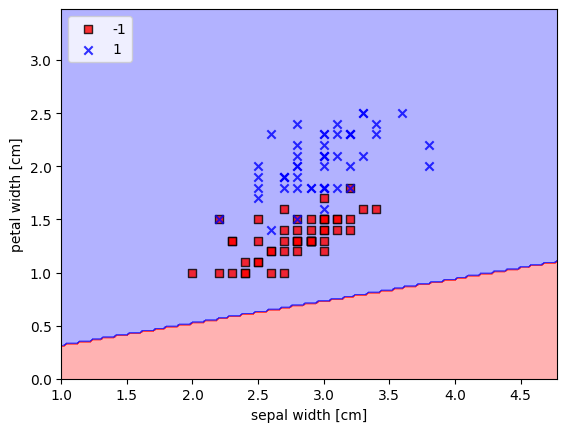

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

### Observation for Perceptron with Two Non-Linearly Separable Features

For this exercise, I plotted versicolor and virginica with the sepal width and petal width features. From the first scatter plot, we can see that certain data points overlap which means that these two features are non-linear, i.e. we can't draw a line to separate the data points from each linearly. After training the perceptron model over 500 iterations, we can see that the errors never converge, oscillating up and down but never hitting zero. This again supports the finding that a non-linear relationship exists. Finally, we plot the decision region using just 10 iterations and see that perceptron draws a line that does not separate the two features from each other at all. It draws a line seemingly randomly below the data points.

## Plotting Versicolor and Virginica using Perceptron with Three Non-Linearly Separable Features

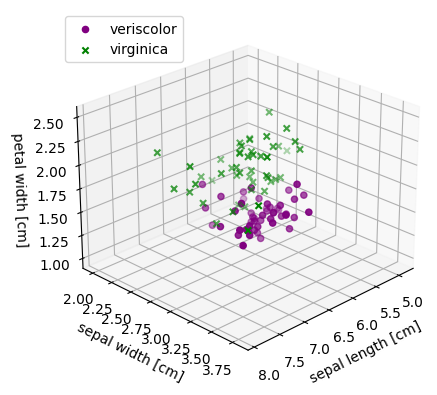

In [21]:
#create a 3D graph for three features
ax = plt.axes(projection='3d')

# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
# extract sepal length, sepal width, and petal width
X = df.iloc[50:150, [0, 1, 3]].values

# plot the data
ax.scatter3D(X[:50, 0], X[:50, 1], X[:50, 2], marker='o', color='purple', label='veriscolor')
ax.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100, 2], marker='x', color='green', label="virginica")
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal width [cm]')
ax.view_init(25,45)

plt.legend(loc='upper left')

plt.show()

### Training the Perceptron Model with Three Non-Linearly Separable Features

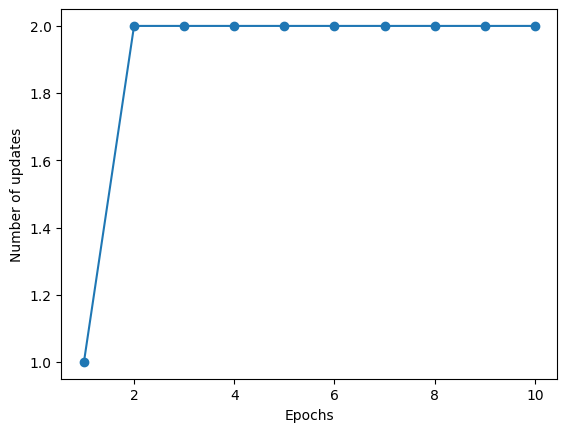

In [22]:
# ppn = Perceptron(eta=0.1, n_iter=500)
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [23]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[50:150,4]

for i in ppn.predict(X):
    if i == -1:
        species.append("Iris-versicolor")
    else: 
        species.append("Iris-virginica")

three_nl = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
three_nl["Correct"] = (three_nl["Prediction"] == three_nl["Actual"])

#view the data
print(three_nl)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(three_nl["Correct"].value_counts())

         Prediction           Actual  Correct
50   Iris-virginica  Iris-versicolor    False
51   Iris-virginica  Iris-versicolor    False
52   Iris-virginica  Iris-versicolor    False
53   Iris-virginica  Iris-versicolor    False
54   Iris-virginica  Iris-versicolor    False
..              ...              ...      ...
145  Iris-virginica   Iris-virginica     True
146  Iris-virginica   Iris-virginica     True
147  Iris-virginica   Iris-virginica     True
148  Iris-virginica   Iris-virginica     True
149  Iris-virginica   Iris-virginica     True

[100 rows x 3 columns]
False    50
True     50
Name: Correct, dtype: int64


### Observation for Perceptron with Three Non-Linearly Separable Features

Here we added sepal length to the sepal width and petal width features for versicolor and virginica. Similar to the previous exercise, we can see the data points for both species overlapping in the 3D plot. However, as before, the model is unable to reach zero errors even after 500 iterations. Finally, we compare perceptron's predictions to the actual data in a table after only 10 iterations. We can see that half of the 100 samples were incorrectly predicted. This makes sense because perceptron cannot work for non-linear data.

## Plotting Versicolor and Virginica using Perceptron with Four Non-Linearly Separable Features

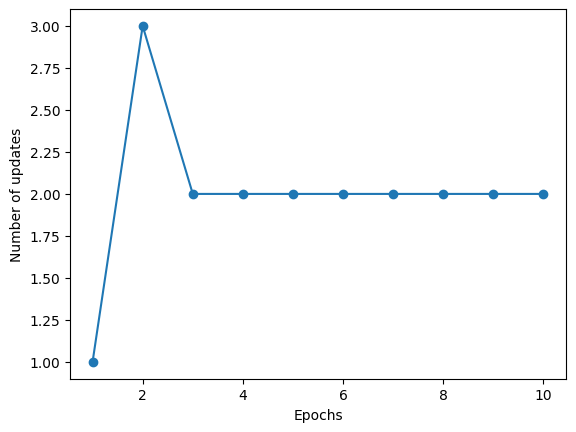

In [24]:
# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[50:150, [0, 1, 2, 3]].values

# ppn = Perceptron(eta=0.1, n_iter=500)
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [25]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[50:150,4]

for i in ppn.predict(X):
    if i == -1:
        species.append("Iris-versicolor")
    else: 
        species.append("Iris-virginica")

four_nl = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
four_nl["Correct"] = (four_nl["Prediction"] == four_nl["Actual"])

#view the data
print(four_nl)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(four_nl["Correct"].value_counts())

         Prediction           Actual  Correct
50   Iris-virginica  Iris-versicolor    False
51   Iris-virginica  Iris-versicolor    False
52   Iris-virginica  Iris-versicolor    False
53   Iris-virginica  Iris-versicolor    False
54   Iris-virginica  Iris-versicolor    False
..              ...              ...      ...
145  Iris-virginica   Iris-virginica     True
146  Iris-virginica   Iris-virginica     True
147  Iris-virginica   Iris-virginica     True
148  Iris-virginica   Iris-virginica     True
149  Iris-virginica   Iris-virginica     True

[100 rows x 3 columns]
False    50
True     50
Name: Correct, dtype: int64


### Observation for Perceptron with Four Non-Linearly Separable Features

In this last test, we used all four features for versicolor and virginica. As it is hard to visually understand 4D graphs, we decided to skip it and train the data. Once again, we see movement as perceptron tries to minimize the errors to zero. Despite its best efforts, perceptron is not flexible enough to handle non-linear relationships. The accuracy improves with more iterations but never hits 100 percent. We decide to stick to 10 iterations and the table results mirror those from the three feature table

<br> <br>

# Implementing the Same Tests Using Adaline

# Adaptive linear neurons and the convergence of learning

## Implementing an adaptive linear neuron in Python

In [26]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Plotting Setosa and Versicolor Using Adaline with Two Linearly Separable Features

Before we can start graphing using Adaline, we have to reset the X and y values to mimic the ones from the first perceptron 
test with two linear features.

In [27]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal width and petal width
X = df.iloc[0:100, [1, 3]].values

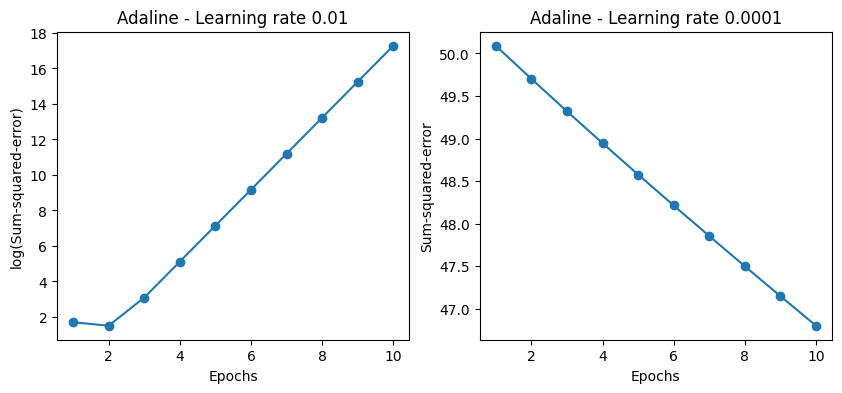

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

## Improving gradient descent through feature scaling

In [29]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

C:\Users\stanl\AppData\Local\Temp\ipykernel_17780\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


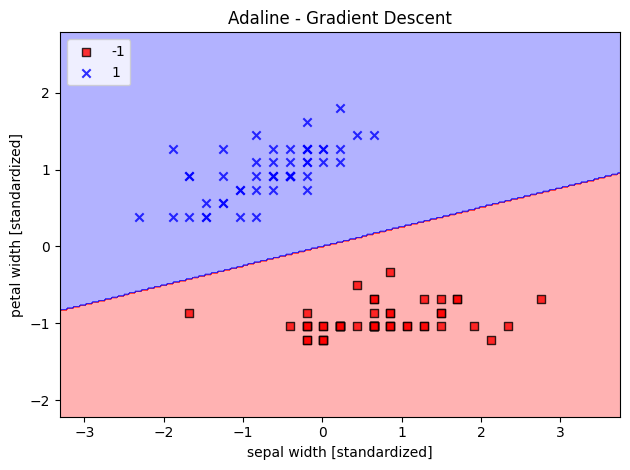

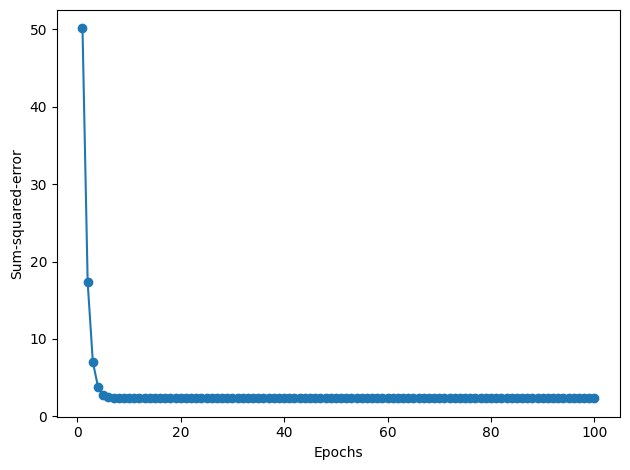

In [30]:
ada_gd = AdalineGD(n_iter=100, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

### Observation

When using the adaline model with the same two features and classes that we used with perceptron, we see that it also draw a linear line through the decision boundary. However, adaline using gradient descent, searches for the best fit as opposed to the first like perceptron. This is interesting as perceptron does not care if the line is perfectly symmetric, it just draws the first line that linearly separates the data. While adaline does not wait to converge on zero, it ends up with a line more similar to what a person would draw to separate the data. Adaline does not seek to reach zero errors but rather minimize the errors and the cost function.

## Large scale machine learning and stochastic gradient descent

In [31]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\stanl\AppData\Local\Temp\ipykernel_17780\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


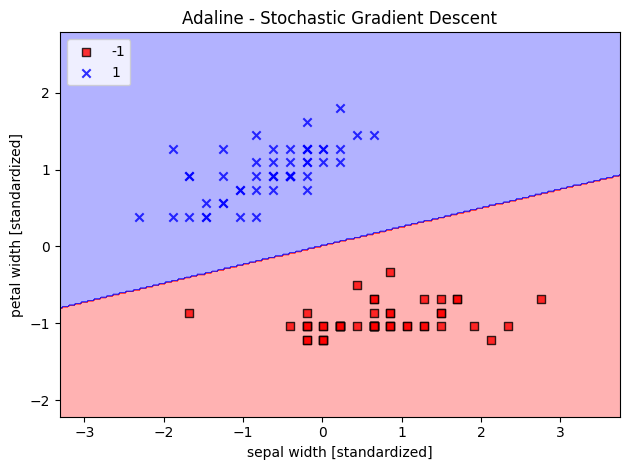

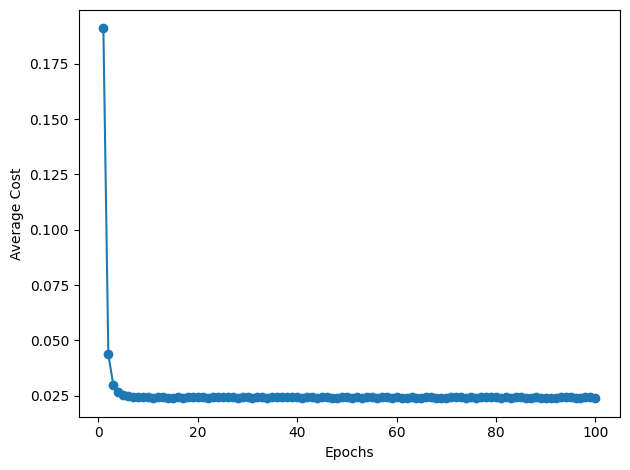

In [32]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

### Observation

The results of using stochastic gradient descent (SGD) are similar to GD. The difference is that SGD is faster and more efficient as it learns by using one sample at a time and swaps it for another sample on each iteration. This constrasts with SGD which iterates through the whole dataset on each pass which takes longer and is not ideal for large datasets. We end up with a line that is nearly identical to the line drawn with SGD, but with slightly more errors. For a small dataset such as the Iris data, this minimal differences are negligible.

## Plotting Setosa and Versicolor Using Adaline with Three Linearly Separable Features

In [33]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width and petal width
X = df.iloc[0:100, [0, 1, 3]].values

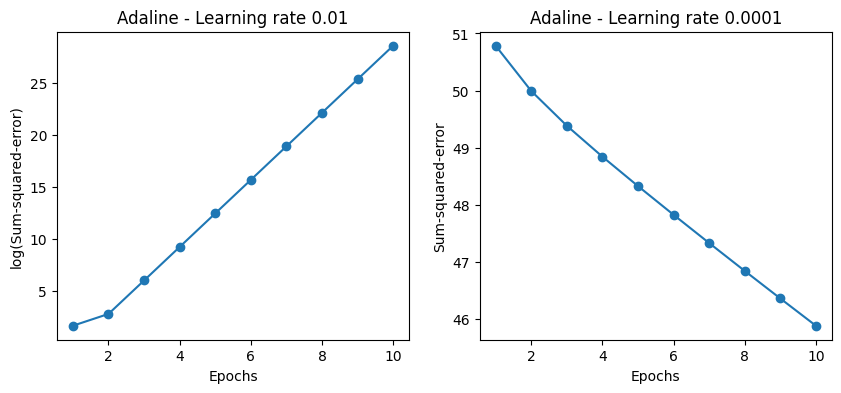

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [35]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

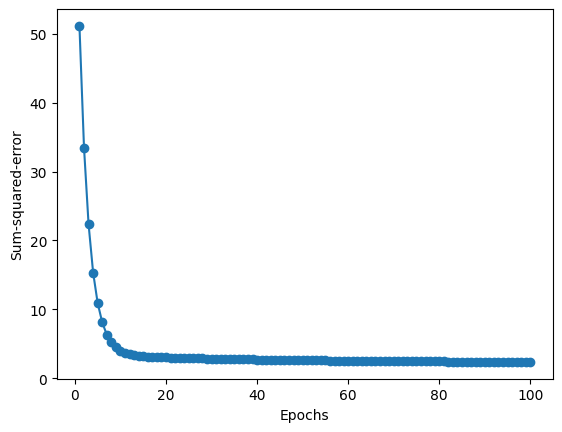

In [36]:
ada_gd = AdalineGD(n_iter=100, eta=0.001)
ada_gd.fit(X_std, y)

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

In [37]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[0:100,4]

for i in ada_gd.predict(X_std):
    if i == -1:
        species.append("Iris-setosa")
    else: 
        species.append("Iris-versicolor")

ada_3f = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_3f["Correct"] = (ada_3f["Prediction"] == ada_3f["Actual"])

#view the data
print(ada_3f)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_3f["Correct"].value_counts())

         Prediction           Actual  Correct
0       Iris-setosa      Iris-setosa     True
1       Iris-setosa      Iris-setosa     True
2       Iris-setosa      Iris-setosa     True
3       Iris-setosa      Iris-setosa     True
4       Iris-setosa      Iris-setosa     True
..              ...              ...      ...
95  Iris-versicolor  Iris-versicolor     True
96  Iris-versicolor  Iris-versicolor     True
97  Iris-versicolor  Iris-versicolor     True
98  Iris-versicolor  Iris-versicolor     True
99  Iris-versicolor  Iris-versicolor     True

[100 rows x 3 columns]
True    100
Name: Correct, dtype: int64


### Observation

After adding another feature, it made it difficult to replicate the decision boundary. Instead, we can plot the sum-squared-error (SSE) against the epochs. This was helpful in demonstrating that the learning rate needed to be adjusted to a lower decimal as it was trending upwards. However, we want the errors to trend downward as close to zero as possible thereby minimizing the cost function. Nonetheless, despite adaline producing an approximation of the linear fit, the table shows that it was 100 percent correct with three features.

## Three Linear Features using SGD

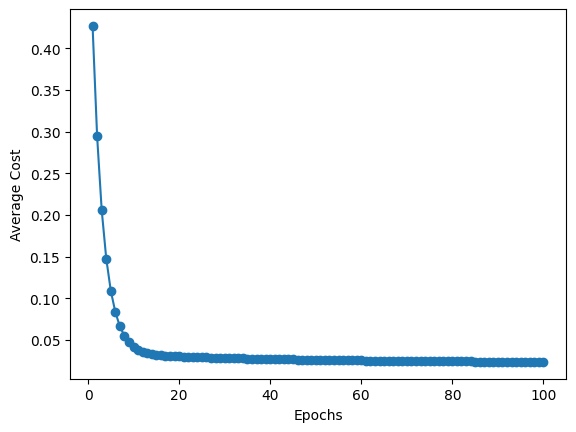

In [38]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.001, random_state=1)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.show()

In [39]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[0:100,4]

for i in ada_sgd.predict(X_std):
    if i == -1:
        species.append("Iris-setosa")
    else: 
        species.append("Iris-versicolor")

ada_sgd_3f = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_sgd_3f["Correct"] = (ada_sgd_3f["Prediction"] == ada_sgd_3f["Actual"])

#view the data
print(ada_sgd_3f)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_sgd_3f["Correct"].value_counts())

         Prediction           Actual  Correct
0       Iris-setosa      Iris-setosa     True
1       Iris-setosa      Iris-setosa     True
2       Iris-setosa      Iris-setosa     True
3       Iris-setosa      Iris-setosa     True
4       Iris-setosa      Iris-setosa     True
..              ...              ...      ...
95  Iris-versicolor  Iris-versicolor     True
96  Iris-versicolor  Iris-versicolor     True
97  Iris-versicolor  Iris-versicolor     True
98  Iris-versicolor  Iris-versicolor     True
99  Iris-versicolor  Iris-versicolor     True

[100 rows x 3 columns]
True    100
Name: Correct, dtype: int64


### Observation

After completing the three feature exercise again using SGD, we see no material difference. The model still predicts the species correctly. The key is choosing the right learning rate to ensure that the errors are minimized and trending in the correct direction.

## Plotting Setosa and Versicolor Using Adaline with Four Linearly Separable Features

In [40]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[0:100, [0, 1, 2, 3]].values

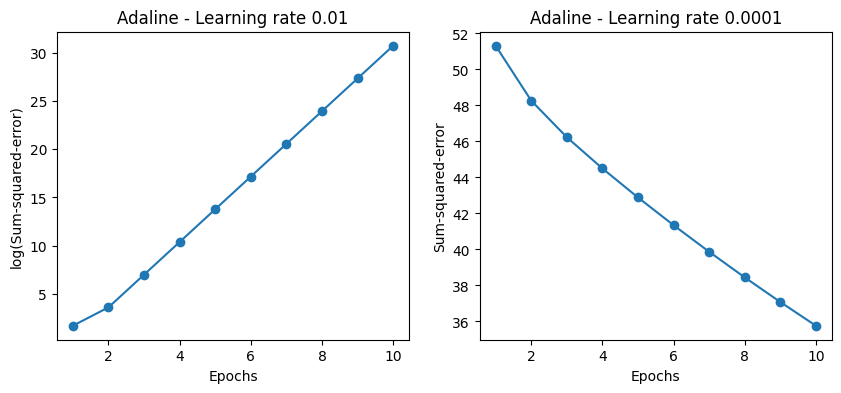

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [42]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

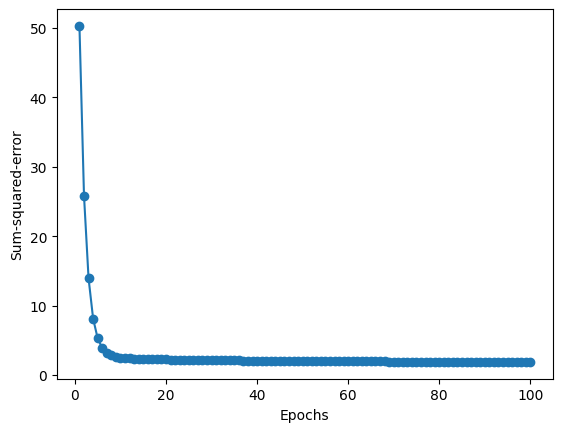

In [43]:
ada_gd = AdalineGD(n_iter=100, eta=0.001)
ada_gd.fit(X_std, y)

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

In [44]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[0:100,4]

for i in ada_gd.predict(X_std):
    if i == -1:
        species.append("Iris-setosa")
    else: 
        species.append("Iris-versicolor")

ada_4f = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_4f["Correct"] = (ada_4f["Prediction"] == ada_4f["Actual"])

#view the data
print(ada_4f)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_4f["Correct"].value_counts())

         Prediction           Actual  Correct
0       Iris-setosa      Iris-setosa     True
1       Iris-setosa      Iris-setosa     True
2       Iris-setosa      Iris-setosa     True
3       Iris-setosa      Iris-setosa     True
4       Iris-setosa      Iris-setosa     True
..              ...              ...      ...
95  Iris-versicolor  Iris-versicolor     True
96  Iris-versicolor  Iris-versicolor     True
97  Iris-versicolor  Iris-versicolor     True
98  Iris-versicolor  Iris-versicolor     True
99  Iris-versicolor  Iris-versicolor     True

[100 rows x 3 columns]
True    100
Name: Correct, dtype: int64


### Observation

Once again, Adaline shows 100 percent accuracy despite adding four features. Logically, adding four features should actually make the prediction easier because it provides additional data points to help differentiate the species. There does not appear to be much change from the three feature graph comparing epochs to SSE.

## Four Linear Features using SGD

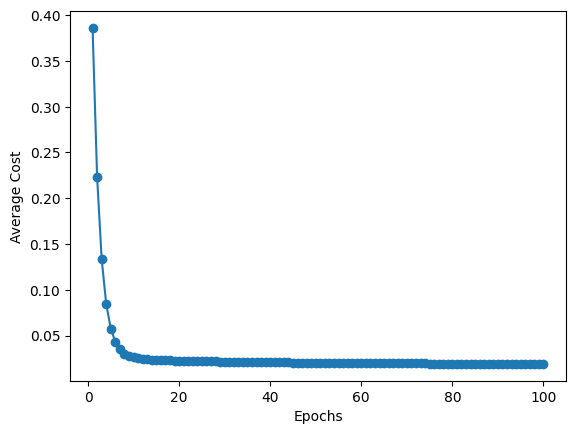

In [45]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.001, random_state=1)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.show()

In [46]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[0:100,4]

for i in ada_sgd.predict(X_std):
    if i == -1:
        species.append("Iris-setosa")
    else: 
        species.append("Iris-versicolor")

ada_sgd_4f = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_sgd_4f["Correct"] = (ada_sgd_4f["Prediction"] == ada_sgd_4f["Actual"])

#view the data
print(ada_sgd_4f)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_sgd_4f["Correct"].value_counts())

         Prediction           Actual  Correct
0       Iris-setosa      Iris-setosa     True
1       Iris-setosa      Iris-setosa     True
2       Iris-setosa      Iris-setosa     True
3       Iris-setosa      Iris-setosa     True
4       Iris-setosa      Iris-setosa     True
..              ...              ...      ...
95  Iris-versicolor  Iris-versicolor     True
96  Iris-versicolor  Iris-versicolor     True
97  Iris-versicolor  Iris-versicolor     True
98  Iris-versicolor  Iris-versicolor     True
99  Iris-versicolor  Iris-versicolor     True

[100 rows x 3 columns]
True    100
Name: Correct, dtype: int64


### Observation

The results of the table and the graph of average cost appear identical to the ones from the three feature exercise. This shows that the additional feature did not make a noticable difference for linearly separable data.


## Plotting Versicolor and Virginica Using Adaline with Two Non-Linearly Separable Features

In [47]:
# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal width and petal width
X = df.iloc[50:150, [1,3]].values

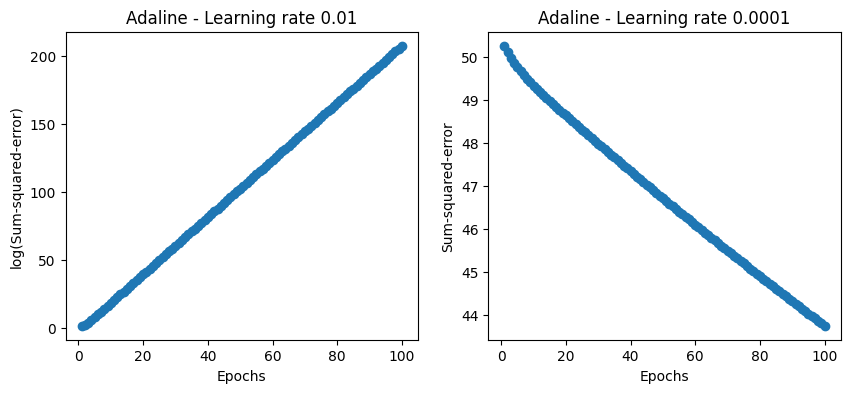

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=100, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [49]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

C:\Users\stanl\AppData\Local\Temp\ipykernel_17780\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


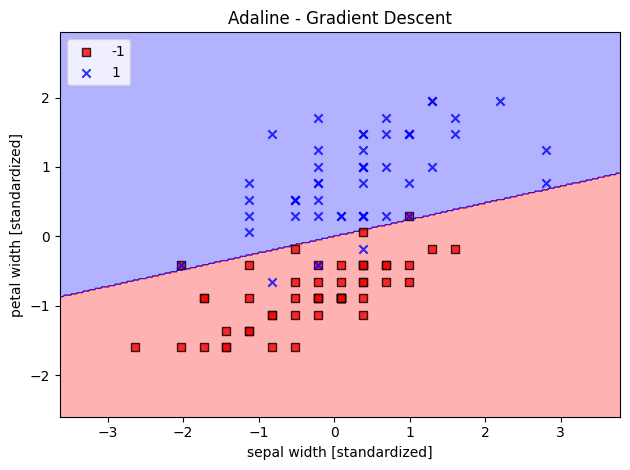

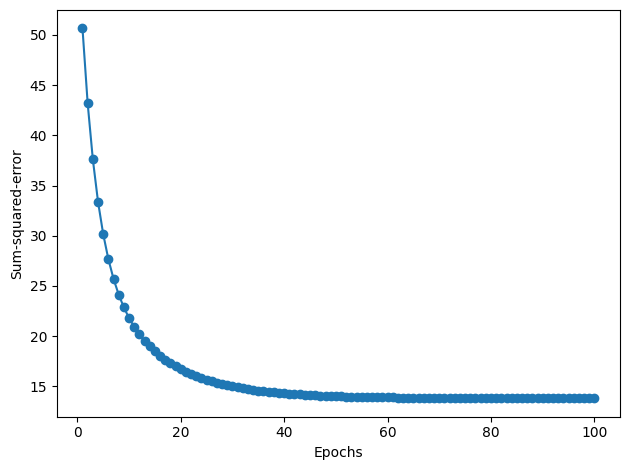

In [50]:
ada_gd = AdalineGD(n_iter=100, eta=0.001)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

### Observation

Using adaline to plot two non-linear features had an interesting outcome. Unlike perceptron, adaline was able to find a much better fitting line that separated most of the data. Similarly, the SSE was minimized quickly and without oscillation, resulting in the errors stablizing sooner.

## Two Non-Linear Features using SGD

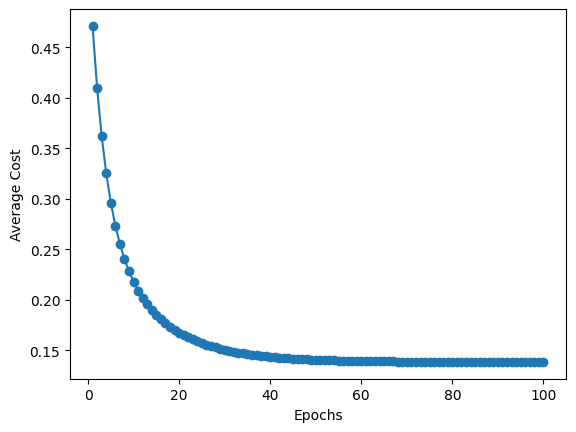

In [51]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.001, random_state=1)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.show()

### Observation

Similar to the linear example, the results of the SGD show no easily discernable difference from GD. It appears that the average cost took a little longer to stabilize but after 100 iteractions, it looks like it reached the same place as GD. Unlike perceptron, which could not fit a representative line for non-linear data and it could not converge even after 500 iterations.

## Plotting Versicolor and Virginica Using Adaline with Three Non-Linearly Separable Features

In [52]:
# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length, sepal width and petal width
X = df.iloc[50:150, [0, 1, 3]].values

In [53]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

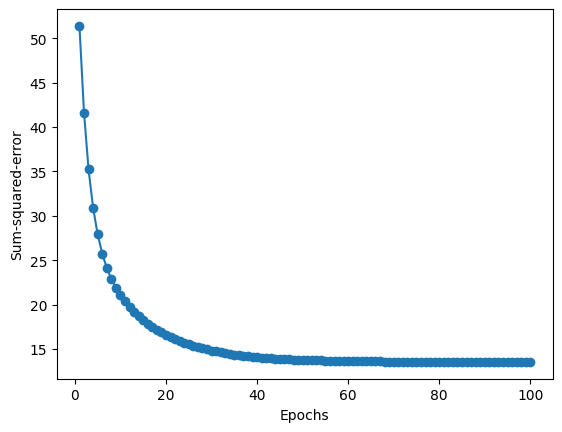

In [54]:
ada_gd = AdalineGD(n_iter=100, eta=0.001)
ada_gd.fit(X_std, y)

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

In [55]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[50:150,4]

for i in ada_gd.predict(X_std):
    if i == -1:
        species.append("Iris-versicolor")
    else: 
        species.append("Iris-virginica")
        
# print(species)        
ada_3f_nl = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_3f_nl["Correct"] = (ada_3f_nl["Prediction"] == ada_3f_nl["Actual"])

#view the data
print(ada_3f_nl)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_3f_nl["Correct"].value_counts())

          Prediction           Actual  Correct
50   Iris-versicolor  Iris-versicolor     True
51   Iris-versicolor  Iris-versicolor     True
52   Iris-versicolor  Iris-versicolor     True
53   Iris-versicolor  Iris-versicolor     True
54   Iris-versicolor  Iris-versicolor     True
..               ...              ...      ...
145   Iris-virginica   Iris-virginica     True
146   Iris-virginica   Iris-virginica     True
147   Iris-virginica   Iris-virginica     True
148   Iris-virginica   Iris-virginica     True
149   Iris-virginica   Iris-virginica     True

[100 rows x 3 columns]
True     95
False     5
Name: Correct, dtype: int64


### Observation

Adding a third feature did not appear to affect the epochs vs SSE graph much. However, the table results were interesting. Whereas adaline GD was able to accurately classifies species at a 100 percent for linear features, it was incorrect 5 percent of the time for non-linear features. This represents that while adaline can handle non-linear features, it still struggles to approximate them as accurately as it can for linear features.

## Three Non-Linear Features using SGD

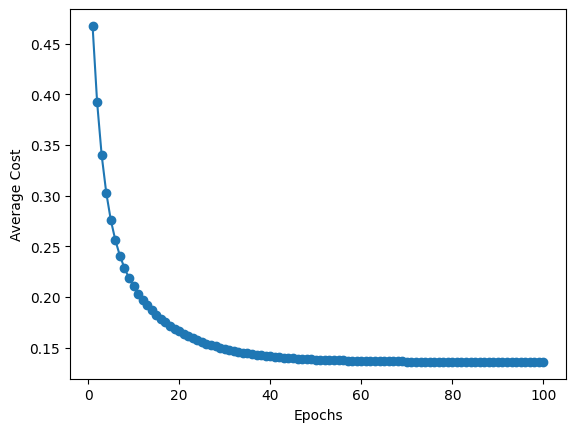

In [56]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.001, random_state=1)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.show()

In [57]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[50:150,4]

for i in ada_sgd.predict(X_std):
    if i == -1:
        species.append("Iris-versicolor")
    else: 
        species.append("Iris-virginica")

ada_sgd_3f_nl = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_sgd_3f_nl["Correct"] = (ada_sgd_3f_nl["Prediction"] == ada_sgd_3f_nl["Actual"])

#view the data
print(ada_sgd_3f_nl)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_sgd_3f_nl["Correct"].value_counts())

          Prediction           Actual  Correct
50   Iris-versicolor  Iris-versicolor     True
51   Iris-versicolor  Iris-versicolor     True
52   Iris-versicolor  Iris-versicolor     True
53   Iris-versicolor  Iris-versicolor     True
54   Iris-versicolor  Iris-versicolor     True
..               ...              ...      ...
145   Iris-virginica   Iris-virginica     True
146   Iris-virginica   Iris-virginica     True
147   Iris-virginica   Iris-virginica     True
148   Iris-virginica   Iris-virginica     True
149   Iris-virginica   Iris-virginica     True

[100 rows x 3 columns]
True     95
False     5
Name: Correct, dtype: int64


### Observation

Applying SGD to the three non-linear features showed very similar if not identical results to GD. As mentioned previously, SGD is used for larger datasets and for efficiency purposes but does not differ markedly in outcomes. GD may be more accurate but in this case both method yielded the same accuracy rate.

## Plotting Versicolor and Virginica Using Adaline with Four Non-Linearly Separable Features

In [58]:
# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[50:150, [0, 1, 2, 3]].values

In [59]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

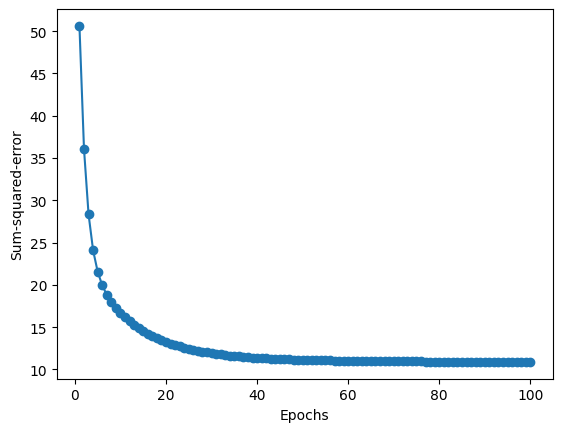

In [60]:
ada_gd = AdalineGD(n_iter=100, eta=0.001)
ada_gd.fit(X_std, y)

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

In [61]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[50:150,4]

for i in ada_gd.predict(X_std):
    if i == -1:
        species.append("Iris-versicolor")
    else: 
        species.append("Iris-virginica")

ada_4f_nl = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_4f_nl["Correct"] = (ada_4f_nl["Prediction"] == ada_4f_nl["Actual"])

#view the data
print(ada_4f_nl)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_4f_nl["Correct"].value_counts())

          Prediction           Actual  Correct
50   Iris-versicolor  Iris-versicolor     True
51   Iris-versicolor  Iris-versicolor     True
52   Iris-versicolor  Iris-versicolor     True
53   Iris-versicolor  Iris-versicolor     True
54   Iris-versicolor  Iris-versicolor     True
..               ...              ...      ...
145   Iris-virginica   Iris-virginica     True
146   Iris-virginica   Iris-virginica     True
147   Iris-virginica   Iris-virginica     True
148   Iris-virginica   Iris-virginica     True
149   Iris-virginica   Iris-virginica     True

[100 rows x 3 columns]
True     97
False     3
Name: Correct, dtype: int64


### Observation

The SSE and Epochs comparison did not appear to move much with the addition of a fourth feature. However, the table shows that there are fewer incorrect predictions this time. Again, this is to be expected. The model has more features to utilize in classifying the two classes.

## Four Non-Linear Features using SGD

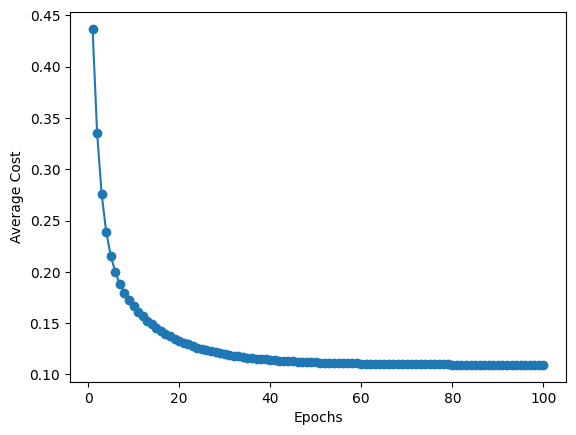

In [62]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.001, random_state=1)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.show()

In [63]:
#Create a new dataframe to compare the predicted species to the actual species for each row
species = []
actual = df.iloc[50:150,4]

for i in ada_sgd.predict(X_std):
    if i == -1:
        species.append("Iris-versicolor")
    else: 
        species.append("Iris-virginica")

ada_sgd_4f_nl = pd.DataFrame({"Prediction":species, "Actual":actual})

#Create a new Correct column to determine if the prediction was correct
ada_sgd_4f_nl["Correct"] = (ada_sgd_4f_nl["Prediction"] == ada_sgd_4f_nl["Actual"])

#view the data
print(ada_sgd_4f_nl)

#Check if any predictions are wrong, i.e. if false exists in the Correct column
print(ada_sgd_4f_nl["Correct"].value_counts())

          Prediction           Actual  Correct
50   Iris-versicolor  Iris-versicolor     True
51   Iris-versicolor  Iris-versicolor     True
52   Iris-versicolor  Iris-versicolor     True
53   Iris-versicolor  Iris-versicolor     True
54   Iris-versicolor  Iris-versicolor     True
..               ...              ...      ...
145   Iris-virginica   Iris-virginica     True
146   Iris-virginica   Iris-virginica     True
147   Iris-virginica   Iris-virginica     True
148   Iris-virginica   Iris-virginica     True
149   Iris-virginica   Iris-virginica     True

[100 rows x 3 columns]
True     97
False     3
Name: Correct, dtype: int64


### Observation

Applying SGD to the four features looks identical to using GD. This is consistent with what we've seen from previous examples. The model can't predict the classes with 100 percent accuracy when the data is non-linear, even when it is as small as the Iris dataset.

<br>
<br>

# Summary

This has been a thorough exploration of the perceptron and adaline models. We have looked at the Iris dataset and tested the models on it by using both linear and non-linear features. Across the examples we used, we saw that increasing the number of features helped improve the accuracy of the models to peform binary classification. The perceptron model worked exceptionally well for linear data which it is meant to do. However, it could not fit a line accurately for non-linear data. This held true despite increasing the number of features.

On the other hand, the adaline model works for both linear and non-linear data. Utilizing GD and SGD, we saw the adaline model predict the class very accurately. It struggled more with non-linear data but it could still approximate it. This is a key distinction between perceptron and adaline. The perceptron seeks to find the first fit that linearly separates the data allowing it to converge on zero errors. Conversely, the adaline model seeks to minimize the cost function and the number of errors as much as possible. It searches for the best fit that approximates the actual data so it can classify it as accurately as possible but it still tolerates some errors.